#  John Schueler
# Program 2 of NLP methodologies
# Recommended to run on Google Colab
# **Topics Covered**: 
bigrams, trigrams, tokenization, stopword elimination, word cleaning, tfidf vectors, wordclouds, part of speech POS, token visualization with graphs, word count and more

## the emails.csv file (1.43GB) can be found here: [link text](https://www.kaggle.com/code/camper/ernon-emails-dataset-classification/data)

In [ ]:
import pandas as pd
import email
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import string
import spacy
import collections
from collections import Counter
from itertools import chain
import dateutil
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter, defaultdict


from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# upload emails.csv
from google.colab import files
uploaded = files.upload()

In [ ]:
emails = pd.read_csv('emails.csv')
emails_1 = pd.read_csv('emails.csv')
emails_2 = pd.read_csv('emails.csv')

FileNotFoundError: ignored

In [ ]:
# pulling 100 random emails from the csv for each of the 3 dataframes.
emails = emails.sample(n = 100, random_state = 100)
emails_1 = emails.sample(n = 100, random_state = 100)

emails_2 = emails.sample(n = 100, random_state = 100)


In [ ]:
emails.head()

,file,message
506236,white-s/meetings/605.,Message-ID: <17918430.1075858787690.JavaMail.e...
247101,kean-s/discussion_threads/3371.,Message-ID: <29371367.1075848188799.JavaMail.e...
508624,williams-j/inbox/183.,Message-ID: <29394976.1075845379388.JavaMail.e...
21658,beck-s/all_documents/1027.,Message-ID: <8308194.1075855769023.JavaMail.ev...
491685,ward-k/all_documents/201.,Message-ID: <8560096.1075851852621.JavaMail.ev...


In [ ]:
emails_2.head()

,file,message
55450,dasovich-j/all_documents/10042.,Message-ID: <10041594.1075843393886.JavaMail.e...
430935,shankman-j/all_documents/49.,Message-ID: <10170989.1075851773928.JavaMail.e...
464859,symes-k/all_documents/3071.,Message-ID: <31597733.1075841690343.JavaMail.e...
248883,kean-s/heat_wave/11.,Message-ID: <9018035.1075846346999.JavaMail.ev...
4851,arnold-j/all_documents/956.,Message-ID: <15382761.1075857612357.JavaMail.e...


In [ ]:

def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column


In [ ]:
emails['date'] = get_field("Date", emails['message'])

emails_1['date'] = get_field("Date", emails_1['message'])
emails_2['date'] = get_field("Date", emails_2['message'])


In [ ]:
# converting email body to uniform format
def convert_date(field, dates):
    column = []
    for date in dates:
        d = dateutil.parser.parse(date)
        column.append(d)
    return column

emails['date_converted'] = convert_date('date', emails['date'])# Convert to uniform format
emails_1['date_converted'] = convert_date('date', emails_1['date'])# Convert to uniform format

emails_2['date_converted'] = convert_date('date', emails_2['date'])# Convert to uniform format

emails.head(3)

,file,message,date,date_converted
506236,white-s/meetings/605.,Message-ID: <17918430.1075858787690.JavaMail.e...,"Tue, 26 Jun 2001 15:32:00 -0700 (PDT)",2001-06-26 15:32:00-07:00
247101,kean-s/discussion_threads/3371.,Message-ID: <29371367.1075848188799.JavaMail.e...,"Wed, 23 May 2001 09:37:00 -0700 (PDT)",2001-05-23 09:37:00-07:00
508624,williams-j/inbox/183.,Message-ID: <29394976.1075845379388.JavaMail.e...,"Tue, 5 Jun 2001 14:39:29 -0700 (PDT)",2001-06-05 14:39:29-07:00


In [ ]:
# converting the different parts of the date to respective columns in string format
dates_df = emails['date_converted'].astype(str).str.split(pat="-", expand = True) # Have to convert column to string (astype(str))
dates_df_1 = emails_1['date_converted'].astype(str).str.split(pat="-", expand = True) # Have to convert column to string (astype(str))
dates_df_2 = emails_2['date_converted'].astype(str).str.split(pat="-", expand = True) # Have to convert column to string (astype(str))

dates_df.columns = ['year','month','day', 'time']
dates_df.columns_1 = ['year','month','day', 'time']
dates_df_2.columns = ['year','month','day', 'time']

dates_df
dates_df.dtypes

<ipython-input-290-55e522951e03>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dates_df.columns_1 = ['year','month','day', 'time']


year     object
month    object
day      object
time     object
dtype: object

In [ ]:
# adding it back to the main dataframes
emails['year'] = dates_df['year']
emails['month'] = dates_df['month']
emails_1['year'] = dates_df['year']
emails_1['month'] = dates_df['month']
emails_2['year'] = dates_df_2['year']
emails_2['month'] = dates_df_2['month']
emails.tail(3)

,file,message,date,date_converted,year,month
56002,dasovich-j/all_documents/10553.,Message-ID: <24042551.1075843410410.JavaMail.e...,"Mon, 2 Apr 2001 10:25:00 -0700 (PDT)",2001-04-02 10:25:00-07:00,2001,04
431991,shankman-j/deleted_items/539.,Message-ID: <32515188.1075852637574.JavaMail.e...,"Thu, 16 Aug 2001 10:57:10 -0700 (PDT)",2001-08-16 10:57:10-07:00,2001,08
168742,hernandez-j/notes_inbox/284.,Message-ID: <26966539.1075855557829.JavaMail.e...,"Thu, 16 Nov 2000 04:37:00 -0800 (PST)",2000-11-16 04:37:00-08:00,2000,11


In [ ]:
emails['year'] = pd.to_numeric(emails['year'])
emails['month'] = pd.to_numeric(emails['month'])
emails_1['year'] = pd.to_numeric(emails_2['year'])
emails_1['month'] = pd.to_numeric(emails_2['month'])
emails_2['year'] = pd.to_numeric(emails_2['year'])
emails_2['month'] = pd.to_numeric(emails_2['month'])
emails.dtypes # Look at types

file              object
message           object
date              object
date_converted    object
year               int64
month              int64
dtype: object

In [ ]:
# dropping respective columns from the main dataframes
emails = emails.drop(['year'], axis=1)
emails = emails.drop(['date_converted'], axis=1)
emails = emails.drop(['date'], axis=1)
emails_1 = emails.drop(['year'], axis=1)
emails_1 = emails.drop(['date_converted'], axis=1)
emails_1 = emails.drop(['date'], axis=1)
emails_2 = emails_2.drop(['year'], axis=1)
emails_2 = emails_2.drop(['date_converted'], axis=1)
emails_2 = emails_2.drop(['date'], axis=1)

KeyError: "['year'] not found in axis"

In [ ]:
# 0 emails have missing data in the 'month' column.
emails.isnull().sum()

In [ ]:
# 11 emails were dated the month of December.
# 7 emails were dated in the month of June.
per_month = pd.DataFrame(emails['month'].value_counts())
per_month.reset_index(inplace=True)
per_month.columns = ["month", "count"]
per_month = per_month.sort_values(by=['month'])
per_month


In [ ]:
# count of emails by month
per_month_1 = pd.DataFrame(emails_1['month'].value_counts())
per_month_1.reset_index(inplace=True)
per_month_1.columns = ["month", "count"]
per_month_1 = per_month_1.sort_values(by=['month'])
per_month_1

,month,count
4,1,11
10,2,5
2,3,13
7,4,6
11,5,4
5,6,7
9,7,5
6,8,6
8,9,5
0,10,14


In [ ]:
# count of emails by month
per_month_2 = pd.DataFrame(emails_2['month'].value_counts())
per_month_2.reset_index(inplace=True)
per_month_2.columns = ["month", "count"]
per_month_2 = per_month_2.sort_values(by=['month'])
per_month_2

,month,count
4,1,11
10,2,5
2,3,13
7,4,6
11,5,4
5,6,7
9,7,5
6,8,6
8,9,5
0,10,14


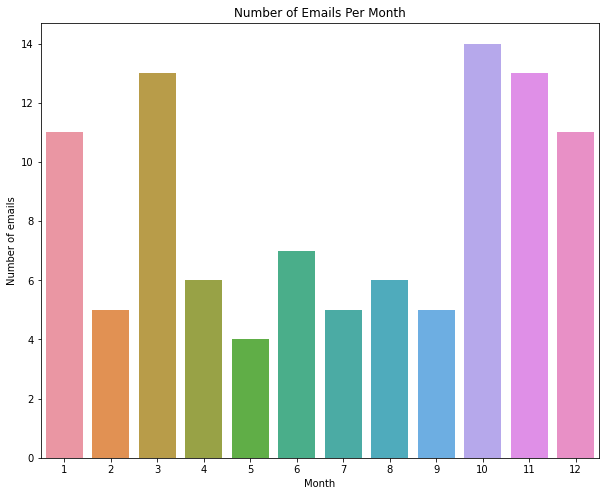

In [ ]:
# graph of number of emails per month with a data visualization
plt.figure(figsize=(10,8))

sns.barplot(y='count', x='month', data=per_month)
plt.title("Number of Emails Per Month")
plt.xlabel("Month")
plt.ylabel("Number of emails")
plt.show()

In [ ]:
emails.head()

,file,message,month
506236,white-s/meetings/605.,Message-ID: <17918430.1075858787690.JavaMail.e...,6
247101,kean-s/discussion_threads/3371.,Message-ID: <29371367.1075848188799.JavaMail.e...,5
508624,williams-j/inbox/183.,Message-ID: <29394976.1075845379388.JavaMail.e...,6
21658,beck-s/all_documents/1027.,Message-ID: <8308194.1075855769023.JavaMail.ev...,11
491685,ward-k/all_documents/201.,Message-ID: <8560096.1075851852621.JavaMail.ev...,3


In [ ]:
# function for message column
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

# putting it together
emails['body'] = body(emails['message'])
emails_1['body'] = body(emails_1['message'])
emails_2['body'] = body(emails_2['message'])

In [ ]:
# dropping the message column from the emails.
emails = emails.drop(['message'], axis=1)
emails_1 = emails_1.drop(['message'], axis=1)
emails_2 = emails_2.drop(['message'], axis=1)

In [ ]:
# dropping emails from seperate dataframes depending on which month they came before or after.
emails_1.drop((emails_1[emails_1['month'] > 6 ].index), inplace = True)
emails_1.drop((emails_1[emails_1['month'] < 6 ].index), inplace = True)
emails_2.drop((emails_2[emails_2['month'] < 12 ].index), inplace = True)

In [ ]:
emails.head()

,file,month,body
506236,white-s/meetings/605.,6,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
508624,williams-j/inbox/183.,6,"[IMAGE]\n =09 =09 Dear Jason, I'm Washingt..."
382022,rogers-b/sent/509.,6,Don:\nI will be leaving early today to catch a...
451588,stclair-c/all_documents/881.,6,Carol St. Clair\nEB 3892\n713-853-3989 (Phone)...
508180,williams-j/deleted_items/278.,6,"From today's issue of the Daily Update, downlo..."


In [ ]:
emails_2.head(30)

,file,month,body
92016,derrick-j/all_documents/66.,12,"John, I believe your message was sent to me by..."
73538,dasovich-j/notes_inbox/2378.,12,INDIVIDUAL.COM\n\nHere's an article recommende...
27744,beck-s/discussion_threads/62.,12,Find attached the EGM Management Summary and H...
405843,scott-s/all_documents/977.,12,this is a funny one\n\n\n\n
84941,davis-d/discussion_threads/321.,12,Marylyn\nDo you have a problem with me taking ...
301156,mann-k/_sent_mail/2601.,12,yes please
118094,fossum-d/discussion_threads/789.,12,http://www.consultrci.com\n\n*****************...
263756,lavorato-j/all_documents/1635.,12,As you know we were trying to do some funding ...
18706,baughman-d/discussion_threads/18.,12,"Dear Don Baughman Jr.,\n\nThank you for orderi..."
492568,ward-k/discussion_threads/48.,12,...


#Text cleaning and preprocessing

In [ ]:
emails['body_cleaned'] = emails['body'].apply(word_tokenize) 

In [ ]:
# tokenize the body of the emails
emails_1['body_cleaned'] = emails_1['body'].apply(word_tokenize) 

In [ ]:
emails_2['body_cleaned'] = emails_2['body'].apply(word_tokenize) 

In [ ]:
# lowercase all the words
emails['body_cleaned'] = emails['body_cleaned'].apply(lambda x: [word.lower() for word in x])

In [ ]:
emails_1['body_cleaned'] = emails_1['body_cleaned'].apply(lambda x: [word.lower() for word in x])

In [ ]:
emails_2['body_cleaned'] = emails_2['body_cleaned'].apply(lambda x: [word.lower() for word in x])

In [ ]:
# create a bigram column from the body of the emails.
emails['bigrams'] = emails['body_cleaned'].apply(lambda row: list(nltk.bigrams(row, )))
emails.tail(3)

,file,month,body,body_cleaned,bigrams
56002,dasovich-j/all_documents/10553.,4,----- Forwarded by Jeff Dasovich/NA/Enron on 0...,"[--, --, -, forwarded, by, jeff, dasovich/na/e...","[(--, --), (--, -), (-, forwarded), (forwarded..."
431991,shankman-j/deleted_items/539.,8,"Jeff,\n\nMy computer was not working yesterday...","[jeff, ,, my, computer, was, not, working, yes...","[(jeff, ,), (,, my), (my, computer), (computer..."
168742,hernandez-j/notes_inbox/284.,11,---------------------- Forwarded by Melissa Ro...,"[--, --, --, --, --, --, --, --, --, --, --, f...","[(--, --), (--, --), (--, --), (--, --), (--, ..."


In [ ]:
bigrams = emails['bigrams'].tolist() # Convert column to list of lists
bigrams = list(chain(*bigrams)) # Flatten the lists to a single list
bigram_freq = collections.Counter(bigrams) # Count
bigram_freq.most_common(10) # Display top 10

[(('*', '*'), 707),
 (('--', '--'), 642),
 (('>', '>'), 323),
 (('!', '!'), 188),
 (('=01', ';'), 162),
 (('@', 'ect'), 126),
 ((';', '=01'), 125),
 (('@', 'enron'), 121),
 (('to', ':'), 117),
 (('subject', ':'), 115)]

In [ ]:
stopwords_nltk = set(nltk.corpus.stopwords.words('english'))
emails['body_cleaned'] = emails['body_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

In [ ]:
emails_1['body_cleaned'] = emails_1['body_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

In [ ]:
emails_2['body_cleaned'] = emails_2['body_cleaned'].apply(lambda x: [word for word in x if word not in stopwords_nltk])

In [ ]:
punc = string.punctuation + '--' 
emails['body_cleaned'] = emails['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
emails['body_cleaned'] = emails['body_cleaned'].apply(lambda x: [word for word in x if word not in digits])

In [ ]:
punc = string.punctuation + '--' 
emails_1['body_cleaned'] = emails_1['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
emails_1['body_cleaned'] = emails_1['body_cleaned'].apply(lambda x: [word for word in x if word not in digits])

In [ ]:
punc = string.punctuation + '--' 
emails_2['body_cleaned'] = emails_2['body_cleaned'].apply(lambda x: [word for word in x if word not in punc])

digits = string.digits 
emails_2['body_cleaned'] = emails_2['body_cleaned'].apply(lambda x: [word for word in x if word not in digits])

In [ ]:
counter = Counter()
emails['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) 
most_freq.columns = ['token', 'count']
most_freq

,token,count
0,error,191
1,'s,167
2,enron,165
3,=01,163
4,ect,126
...,...,...
5205,______________________________________________...,1
5206,msn,1
5207,hotmail,1
5208,//www.hotmail.com,1


In [ ]:
counter = Counter()
emails_1['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) 
most_freq.columns = ['token', 'count']
most_freq

,token,count
0,'s,43
1,http,23
2,'',20
3,click,18
4,stocks,16
...,...,...
880,handle,1
881,underage,1
882,told,1
883,interconnect,1


In [ ]:
counter = Counter()
emails_2['body_cleaned'].map(counter.update)
most_freq = pd.DataFrame(counter.most_common()) 
most_freq.columns = ['token', 'count']
most_freq

,token,count
0,e,29
1,pg,26
2,'s,24
3,power,22
4,would,20
...,...,...
1133,strictly,1
1134,prohibited,1
1135,error,1
1136,outage.dbf,1


In [ ]:
emails['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails['body_cleaned']]

body_cleaned_list = emails['body_cleaned_string'].tolist()

words_for_cloud = str(body_cleaned_list)
words_for_cloud

'[\'calendar entry appointment description scott mills date 10/3/2000 time 10:00 11:00 central standard time chairperson outlook migration team detailed description\', "dear advisory board member thank continued support nacecs initiative `` environmental challenges opportunities evolving continental electricity market \'\' please find attached following documents review discussed conference call thursday may 24 3:00 est interim note secretariat report draft recommendations checklist initial discussion list advisory board members bios please note shortened bios yet submit bio please send copy yolanda ccemtl.org items discussed conference call secretariat update progress expert report symposium ii process approach developing guidelines/recommendations iii initial discussion guidelines/recommendations iv 2nd advisory board meeting date venue details conference call participants canada united states dial 1-877-633-5353 toll free participants mexico dial 0-1-800-123-0200 ask operator charge

In [ ]:
emails_1['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails_1['body_cleaned']]

body_cleaned_list = emails_1['body_cleaned_string'].tolist()

words_for_cloud = str(body_cleaned_list)
words_for_cloud

'[\'calendar entry appointment description scott mills date 10/3/2000 time 10:00 11:00 central standard time chairperson outlook migration team detailed description\', "today \'s issue daily update download analysts\' comments energy-industry trends potentially resuming lucent lu alcatel ala talks buying opportunities summer much free research editor \'s picks come daily investor http //www.multexinvestor.com/magazinecover.asp nd=0604 investor receiving mail registered multex investor unsubscribe see bottom message ======================== sponsored ========================= buy stocks \'s great way invest long-term sharebuilder lets make dollar-based investments stocks index shares choose transactions cost child \'s account account investment minimums http //service.bfast.com/bfast/click bfmid=29150849 siteid=38314164 bfpage=home =============================================================== featured today \'s edition daily update today \'s special report cibc world markets sees orde

In [ ]:

emails_2['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails_2['body_cleaned']]

body_cleaned_list = emails_2['body_cleaned_string'].tolist()

words_for_cloud = str(body_cleaned_list)
words_for_cloud

'[\'john believe message sent mistake returning jim forwarded james derrick/corp/enron 12/01/2000 02:29 pm john belew enron_development 11/29/2000 12:28 executive compensation enron cc subject deferral enrollment 2001 please e-mail id number india past deadline thanks john\', "individual.com \'s article recommended karen denne comes via individual.com inc following message attached story requested send story appeared http //www.individual.com december 11 2000 _________________________________________________________ b repeats calif. power resources 3,752 mw short 2001 david feliciano bridgenews scottsdale ariz. dec. california resources reserves electricity 3,752 megawatts short anticipated load 2001 california independent system operator iso president ceo terry winter said thursday annual western systems coordinating council meeting \'\' \'m concerned supply \'\' winter said `` without sufficient supply markets set socially politically unacceptable price levels wholesale power \'\' wi

In [ ]:
docs_1 = list(spacy_model.pipe(emails_1.body_cleaned_string))

In [ ]:
docs_2 = list(spacy_model.pipe(emails_2.body_cleaned_string))

In [ ]:
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs_1):
    """Extract tokens and metadata from list of spaCy docs."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs_1):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

In [ ]:
def extract_tokens_plus_meta(doc:spacy.tokens.doc.Doc):
    """Extract tokens and metadata from individual spaCy doc."""
    return [
        (i.text, i.i, i.lemma_, i.ent_type_, i.tag_, 
         i.dep_, i.pos_, i.is_stop, i.is_alpha, 
         i.is_digit, i.is_punct) for i in doc
    ]

def tidy_tokens(docs_2):
    """Extract tokens and metadata from list of spaCy docs_2."""
    
    cols = [
        "doc_id", "token", "token_order", "lemma", 
        "ent_type", "tag", "dep", "pos", "is_stop", 
        "is_alpha", "is_digit", "is_punct"
    ]
    
    meta_df = []
    for ix, doc in enumerate(docs_2):
        meta = extract_tokens_plus_meta(doc)
        meta = pd.DataFrame(meta)
        meta.columns = cols[1:]
        meta = meta.assign(doc_id = ix).loc[:, cols]
        meta_df.append(meta)
        
    return pd.concat(meta_df)  

In [ ]:
spacy_meta_1 = tidy_tokens(docs_1)
spacy_meta_1

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,calendar,0,calendar,,VB,npadvmod,VERB,False,True,False,False
1,0,entry,1,entry,,NN,compound,NOUN,False,True,False,False
2,0,appointment,2,appointment,,NN,compound,NOUN,False,True,False,False
3,0,description,3,description,,NN,dobj,NOUN,False,True,False,False
4,0,scott,4,scott,PERSON,NNP,compound,PROPN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
156,6,-,156,-,DATE,HYPH,punct,PUNCT,False,False,False,True
157,6,weeks,157,week,DATE,NNS,npadvmod,NOUN,False,True,False,False
158,6,effective,158,effective,,JJ,amod,ADJ,False,True,False,False
159,6,march,159,march,DATE,NNP,compound,PROPN,False,True,False,False


In [ ]:
spacy_meta_2 = tidy_tokens(docs_2)
spacy_meta_2

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
0,0,john,0,john,PERSON,NNP,nsubj,PROPN,False,True,False,False
1,0,believe,1,believe,PERSON,VBP,ROOT,VERB,False,True,False,False
2,0,message,2,message,,NN,nsubj,NOUN,False,True,False,False
3,0,sent,3,send,,VBD,ccomp,VERB,False,True,False,False
4,0,mistake,4,mistake,,NN,dobj,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
86,10,error,86,error,,NN,nsubj,NOUN,False,True,False,False
87,10,please,87,please,,UH,intj,INTJ,True,True,False,False
88,10,delete,88,delete,,VB,ccomp,VERB,False,True,False,False
89,10,outage.dbf,89,outage.dbf,,NNP,compound,PROPN,False,False,False,False


In [ ]:

nouns_1 = spacy_meta_1[spacy_meta_1['pos'] == 'NOUN']
nouns_1

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
1,0,entry,1,entry,,NN,compound,NOUN,False,True,False,False
2,0,appointment,2,appointment,,NN,compound,NOUN,False,True,False,False
3,0,description,3,description,,NN,dobj,NOUN,False,True,False,False
8,0,time,8,time,,NN,npadvmod,NOUN,False,True,False,False
13,0,time,13,time,,NN,compound,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,6,buyback,147,buyback,,NN,compound,NOUN,False,True,False,False
148,6,ticket,148,ticket,,NN,dobj,NOUN,False,True,False,False
152,6,underage,152,underage,,NN,dobj,NOUN,False,True,False,False
157,6,weeks,157,week,DATE,NNS,npadvmod,NOUN,False,True,False,False


In [ ]:

nouns_2 = spacy_meta_2[spacy_meta_2['pos'] == 'NOUN']
nouns_2

,doc_id,token,token_order,lemma,ent_type,tag,dep,pos,is_stop,is_alpha,is_digit,is_punct
2,0,message,2,message,,NN,nsubj,NOUN,False,True,False,False
4,0,mistake,4,mistake,,NN,dobj,NOUN,False,True,False,False
16,0,pm,16,pm,TIME,NN,nsubj,NOUN,False,True,False,False
22,0,executive,22,executive,,NN,compound,NOUN,False,True,False,False
23,0,compensation,23,compensation,,NN,ROOT,NOUN,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
83,10,e,83,e,,NN,compound,NOUN,False,True,False,False
84,10,-,84,-,,NN,compound,NOUN,False,False,False,True
85,10,mail,85,mail,,NN,compound,NOUN,False,True,False,False
86,10,error,86,error,,NN,nsubj,NOUN,False,True,False,False


In [ ]:
nouns_count_1 = pd.DataFrame(nouns_1.groupby(['token']).size())
nouns_count_1.columns = ['count']
nouns_count_1 = nouns_count_1.sort_values(by=['count'], ascending = False)
nouns_count_1['count'] = pd.to_numeric(nouns_count_1['count'])
nouns_count_1.head(30)


,count
token,
ect,22
http,19
hou,16
stocks,15
report,11
update,10
investor,9
analyst,8
gas,8


In [ ]:
nouns_count_2 = pd.DataFrame(nouns_2.groupby(['token']).size())
nouns_count_2.columns = ['count']
nouns_count_2 = nouns_count_2.sort_values(by=['count'], ascending = False)
nouns_count_2['count'] = pd.to_numeric(nouns_count_2['count'])
nouns_count_2.head(30)

,count
token,
_,230
e,21
power,21
utility,16
municipalization,13
cities,10
time,10
http,10
news,9


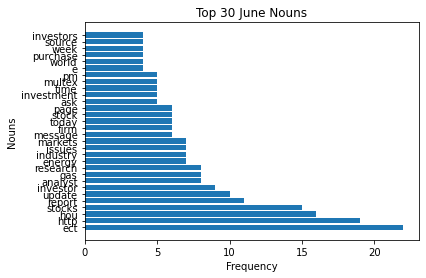

In [ ]:
y_axis = ['ect', 'http', 'hou', 'stocks', 'report', 'update', 'investor', 'analyst', 'gas', 'research', 'energy', 'industry', 'issues', 'markets', 'message', 'firm', 'today', 'stock', 'page', 'ask', 'investment', 'time', 'multex', 'pm', 'e', 'world', 'purchase', 'week', 'source', 'investors'] 
x_axis = [22, 19, 16, 15, 11, 10, 9, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4]

plt.barh(y_axis,x_axis)
plt.title('Top 30 June Nouns')
plt.ylabel('Nouns')
plt.xlabel('Frequency')
plt.show()

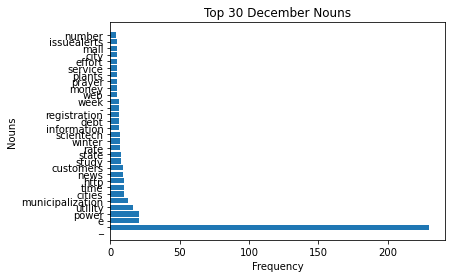

In [ ]:
y_axis = ['_', 'e', 'power', 'utility', 'municipalization', 'cities', 'time', 'http', 'news', 'customers', 'study', 'state', 'rate', 'winter', 'scientech', 'information', 'debt', 'registration', '-', 'week', 'web', 'money', 'prayer', 'plants', 'service', 'effort', 'city', 'mall', 'issuealerts', 'number'] 
x_axis = [230, 21, 21, 16, 13, 10, 10, 10, 9, 9, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4]

plt.barh(y_axis,x_axis)
plt.title('Top 30 December Nouns')
plt.ylabel('Nouns')
plt.xlabel('Frequency')
plt.show()

In [ ]:
# The spacy noun engine is clearly not very effective. Several of the most frequent 'nouns' were not nouns at all.
# The top 30 June words consisted of more classical finance terms. Words such as 'investor', 'analyst', and 'gas'
# are were very common. The top 30 December words consisted of words that were more common in the public sector:
# 'municipalization', 'cities', 'news', and 'state'. This could suggest that there was concern or interest in
# sectors dealing with the government then. Perhaps this is when Enron became suspicious that they 
# were being investigated by the federal government? This gives us clues as to what hypotheses we can form.

In [ ]:
# I am not electing to drop any additional stopwords at my discretion. Although there could be some use in doing so,
# I believe that leaving in punctuation marks, acronyms, and abbreviations can be utilized effectively
# in identifying writing styles and tones of authors that can help uncover more 
# information regarding the Enron corpus and the scandal.
stopwords_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
sents = pd.DataFrame(emails['body'].apply(sent_tokenize))
sents.head(3)

,body
506236,[CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\...
247101,"[Dear Advisory Board Member,\n\nThank you for ..."
508624,"[[IMAGE]\n =09 =09 Dear Jason, I'm Washing..."


In [ ]:
sents = sents.body.tolist() 
sents = list(chain(*sents)) 
sents = pd.DataFrame(sents) 
sents.columns = ['body'] 
sents

,body
0,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...
1,"Dear Advisory Board Member,\n\nThank you for y..."
2,Please find attached the following documents f...
3,1) an Interim Note for the Secretariat report\...
4,"Environment, Economy and Trade Program\nNorth ..."
...,...
1234,You will\n> >> > Have Good Luck For Two\n> >> ...
1235,> >> > >\n> >> > > > > If this is sent to you ...
1236,> >> > > > >\n> >> > > > >\n> >> > > >\n> >> >...
1237,>Find out for yourself at http://www.collegecl...


In [ ]:
sents['body_cleaned'] = sents['body'].apply(word_tokenize)
sents.head(3)

,body,body_cleaned
0,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,"[CALENDAR, ENTRY, :, APPOINTMENT, Description,..."
1,"Dear Advisory Board Member,\n\nThank you for y...","[Dear, Advisory, Board, Member, ,, Thank, you,..."
2,Please find attached the following documents f...,"[Please, find, attached, the, following, docum..."


In [ ]:
sents['trigrams'] = sents['body_cleaned'].apply(lambda row: list(nltk.trigrams(row, )))
sents.head(3)

,body,body_cleaned,trigrams
0,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,"[CALENDAR, ENTRY, :, APPOINTMENT, Description,...","[(CALENDAR, ENTRY, :), (ENTRY, :, APPOINTMENT)..."
1,"Dear Advisory Board Member,\n\nThank you for y...","[Dear, Advisory, Board, Member, ,, Thank, you,...","[(Dear, Advisory, Board), (Advisory, Board, Me..."
2,Please find attached the following documents f...,"[Please, find, attached, the, following, docum...","[(Please, find, attached), (find, attached, th..."


In [ ]:
trigrams_list = sents['trigrams'].tolist() # Convert column to list of lists
trigrams_list = list(chain(*trigrams_list)) # Flatten the lists to a single list
trigrams_list

[('CALENDAR', 'ENTRY', ':'),
 ('ENTRY', ':', 'APPOINTMENT'),
 (':', 'APPOINTMENT', 'Description'),
 ('APPOINTMENT', 'Description', ':'),
 ('Description', ':', 'Scott'),
 (':', 'Scott', 'Mills'),
 ('Scott', 'Mills', 'Date'),
 ('Mills', 'Date', ':'),
 ('Date', ':', '10/3/2000'),
 (':', '10/3/2000', 'Time'),
 ('10/3/2000', 'Time', ':'),
 ('Time', ':', '10:00'),
 (':', '10:00', 'AM'),
 ('10:00', 'AM', '-'),
 ('AM', '-', '11:00'),
 ('-', '11:00', 'AM'),
 ('11:00', 'AM', '('),
 ('AM', '(', 'Central'),
 ('(', 'Central', 'Standard'),
 ('Central', 'Standard', 'Time'),
 ('Standard', 'Time', ')'),
 ('Time', ')', 'Chairperson'),
 (')', 'Chairperson', ':'),
 ('Chairperson', ':', 'Outlook'),
 (':', 'Outlook', 'Migration'),
 ('Outlook', 'Migration', 'Team'),
 ('Migration', 'Team', 'Detailed'),
 ('Team', 'Detailed', 'Description'),
 ('Detailed', 'Description', ':'),
 ('Dear', 'Advisory', 'Board'),
 ('Advisory', 'Board', 'Member'),
 ('Board', 'Member', ','),
 ('Member', ',', 'Thank'),
 (',', 'Thank', '

In [ ]:
model = defaultdict(lambda: defaultdict(lambda: 0))

In [ ]:
for w1, w2, w3 in trigrams_list:
    model[(w1, w2)][w3] += 1

In [ ]:
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [ ]:
# 'and' 'to' 'women' is quite interesting. Perhaps there is some sort of bias against female
# employees in the corpus? This could warrant more research to see if there is more evidence
# supporting this hypotheses.
dict(model['and', 'to'])

{'be': 0.3333333333333333,
 'the': 0.3333333333333333,
 'women': 0.3333333333333333}

In [ ]:
tokens = emails_1['body'].apply(word_tokenize) 
print(len(tokens.explode())) # Total number of tokens
print(len(set(tokens.explode()))) # Number of unique tokens

3354
1118


In [ ]:
tokens = emails_2['body'].apply(word_tokenize) 
print(len(tokens.explode())) # Total number of tokens
print(len(set(tokens.explode()))) # Number of unique tokens

4139
1395


In [ ]:
counter = Counter()
emails_1['body_cleaned'].map(counter.update)
most_freq_1 = pd.DataFrame(counter.most_common()) # Or add number within parens to list only x most common
most_freq_1.columns = ['token', 'count']
most_freq_1.dtypes


token    object
count     int64
dtype: object

In [ ]:
counter = Counter()
emails_2['body_cleaned'].map(counter.update)
most_freq_2 = pd.DataFrame(counter.most_common()) # Or add number within parens to list only x most common
most_freq_2.columns = ['token', 'count']
most_freq_2.dtypes


token    object
count     int64
dtype: object

In [ ]:

emails_1['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails_1['body_cleaned']]

body_cleaned_list_1 = emails_1['body_cleaned_string'].tolist()

words_for_cloud_1 = str(body_cleaned_list_1)
words_for_cloud_1

'[\'calendar entry appointment description scott mills date 10/3/2000 time 10:00 11:00 central standard time chairperson outlook migration team detailed description\', "today \'s issue daily update download analysts\' comments energy-industry trends potentially resuming lucent lu alcatel ala talks buying opportunities summer much free research editor \'s picks come daily investor http //www.multexinvestor.com/magazinecover.asp nd=0604 investor receiving mail registered multex investor unsubscribe see bottom message ======================== sponsored ========================= buy stocks \'s great way invest long-term sharebuilder lets make dollar-based investments stocks index shares choose transactions cost child \'s account account investment minimums http //service.bfast.com/bfast/click bfmid=29150849 siteid=38314164 bfpage=home =============================================================== featured today \'s edition daily update today \'s special report cibc world markets sees orde

In [ ]:

emails_2['body_cleaned_string'] = [' '.join(map(str, l)) for l in emails_2['body_cleaned']]

body_cleaned_list_2 = emails_2['body_cleaned_string'].tolist()

words_for_cloud_2 = str(body_cleaned_list_2)
words_for_cloud_2

'[\'john believe message sent mistake returning jim forwarded james derrick/corp/enron 12/01/2000 02:29 pm john belew enron_development 11/29/2000 12:28 executive compensation enron cc subject deferral enrollment 2001 please e-mail id number india past deadline thanks john\', "individual.com \'s article recommended karen denne comes via individual.com inc following message attached story requested send story appeared http //www.individual.com december 11 2000 _________________________________________________________ b repeats calif. power resources 3,752 mw short 2001 david feliciano bridgenews scottsdale ariz. dec. california resources reserves electricity 3,752 megawatts short anticipated load 2001 california independent system operator iso president ceo terry winter said thursday annual western systems coordinating council meeting \'\' \'m concerned supply \'\' winter said `` without sufficient supply markets set socially politically unacceptable price levels wholesale power \'\' wi

In [ ]:
def create_from_text_wordcloud_1(text, title):
    wordcloud = WordCloud(
        width = 750, 
        height = 500,
        max_words = 750, 
        background_color = 'white',
        collocations = False).generate(text)
    wordcloud.recolor(color_func = lambda *args, **kwargs: 'black')
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig('enron_wordcloud.png')
    plt.show()
    


In [ ]:
def create_from_text_wordcloud_2(text, title):
    wordcloud = WordCloud(
        width = 750, 
        height = 500,
        max_words = 750, 
        background_color = 'white',
        collocations = False).generate(text)
    wordcloud.recolor(color_func = lambda *args, **kwargs: 'black')
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig('enron_wordcloud.png')
    plt.show()
    


In [ ]:

vectorizer = TfidfVectorizer() 
tfidf_vector_1 = vectorizer.fit_transform(body_cleaned_list_1)
tfidf_words_1 = vectorizer.get_feature_names()

In [ ]:

vectorizer = TfidfVectorizer() 
tfidf_vector_2 = vectorizer.fit_transform(body_cleaned_list_2)
tfidf_words_2 = vectorizer.get_feature_names()

In [ ]:
dense_1 = tfidf_vector_1.todense()
denselist_1 = dense_1.tolist()
tfidf_df_1 = pd.DataFrame(denselist_1, columns = tfidf_words_1)
tfidf_df_1.head(3)

,00,01,02,03,04,05,06,0604,07,08,...,wolfgang,word,words,working,world,wrap,written,www,year,yesterday
0,0.297148,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.164827,0.0,0.0,...,0.0,0.013736,0.013736,0.0,0.054942,0.0,0.0,0.260976,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [ ]:
dense_2 = tfidf_vector_2.todense()
denselist_2 = dense_2.tolist()
tfidf_df_2 = pd.DataFrame(denselist_2, columns = tfidf_words_2)
tfidf_df_2.head(3)

,00,000,01,01803,01v,02,0306,07,08,10,...,worst,would,writing,www,xls,year,yeo5im,yes,yet,zl
0,0.0,0.000000,0.118958,0.00000,0.00000,0.118958,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.061816,0.000000,0.03616,0.03616,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.121459,0.0,0.030908,0.0,0.0,0.030908,0.0
2,0.0,0.000000,0.084878,0.00000,0.00000,0.084878,0.0,0.112912,0.225825,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [ ]:

tfidf_df_transp_1 = tfidf_df_1.transpose()
tfidf_df_transp_1.columns = tfidf_df_transp_1.columns.map(str) # Convert integer column names to strings
tfidf_df_transp_1.tail(3)

,0,1,2,3,4,5,6
www,0.0,0.260976,0.0,0.000000,0.000000,0.0,0.0
year,0.0,0.000000,0.0,0.000000,0.032886,0.0,0.0
yesterday,0.0,0.000000,0.0,0.025286,0.000000,0.0,0.0


In [ ]:

tfidf_df_transp_2 = tfidf_df_2.transpose()
tfidf_df_transp_2.columns = tfidf_df_transp_2.columns.map(str) # Convert integer column names to strings
tfidf_df_transp_2.tail(3)

,0,1,2,3,4,5,6,7,8,9,10
yes,0.0,0.000000,0.0,0.0,0.0,0.875748,0.000000,0.0,0.0,0.000000,0.0
yet,0.0,0.030908,0.0,0.0,0.0,0.000000,0.005319,0.0,0.0,0.000000,0.0
zl,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.086865,0.0


In [ ]:
def create_from_table_wordcloud_11(table, title):
    wordcloud = WordCloud(
        width = 750, 
        height = 500,
        max_words = 750, 
        background_color = 'white',
        collocations = False).generate_from_frequencies(table)
    wordcloud.recolor(color_func = lambda *args, **kwargs: 'black')
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig('enron_tfidf_wordcloud.png')
    plt.show()

In [ ]:
def create_from_table_wordcloud_12(table, title):
    wordcloud = WordCloud(
        width = 750, 
        height = 500,
        max_words = 750, 
        background_color = 'white',
        collocations = False).generate_from_frequencies(table)
    wordcloud.recolor(color_func = lambda *args, **kwargs: 'black')
    plt.figure(figsize=[10,10])
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig('enron_tfidf_wordcloud.png')
    plt.show()

In [ ]:
# There are many more words in the June word cloud than the December word cloud.
# Many of the words in the June worldcloud strike me as more competitive and harsh: 'analyst', 'expert', 'stocks'.
# The words in the December wordcloud seem more expressive: "individual", "natural", "news"

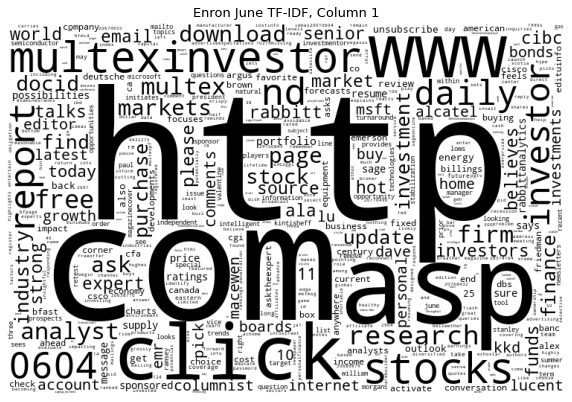

In [ ]:
create_from_table_wordcloud_11(tfidf_df_transp_1['1'], 'Enron June TF-IDF, Column 1')

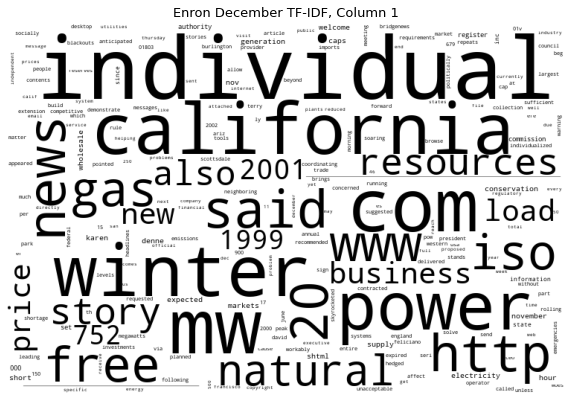

In [ ]:
create_from_table_wordcloud_12(tfidf_df_transp_2['1'], 'Enron December TF-IDF, Column 1')